<a href="https://colab.research.google.com/github/rohitpawar4507/K-Means-algorithm-using-Python/blob/main/K_Means_algorithm_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means algorithm using Python**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**1. Read Training Data**

Using pandas to read the file

In [11]:
df = pd.read_csv("data.csv")
df.head()

,year,rank,name,sector,industry,revenues,revchange,profits,prftchange,assets,employees,hqcity,hqstate,newcomer,profitable,ceowoman,jobgrowth,permalink
0,2019,1.0,Walmart,Retailing,General Merchandisers,514405.0,2.8,6670.0,-32.4,219295.0,2200000,Bentonville,Arkansas,no,yes,no,no,https://fortune.com/global500/2019/walmart/
1,2019,2.0,Sinopec Group,Energy,Petroleum Refining,414649.9,26.8,5845.0,280.1,329186.3,619151,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/sinopec-group/
2,2019,3.0,Royal Dutch Shell,Energy,Petroleum Refining,396556.0,27.2,23352.0,79.9,399194.0,81000,The Hague,NaN,no,yes,no,no,https://fortune.com/global500/2019/royal-dutch...
3,2019,4.0,China National Petroleum,Energy,Petroleum Refining,392976.6,20.5,2270.5,NaN,601899.9,1382401,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/china-natio...
4,2019,5.0,State Grid,Energy,Utilities,387056.0,10.9,8174.8,-14.3,572309.5,917717,Beijing,NaN,no,yes,no,yes,https://fortune.com/global500/2019/state-grid/


***Apply Scatter plot to visualize after reading data to check each row ***

Text(0, 0.5, 'revenues')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


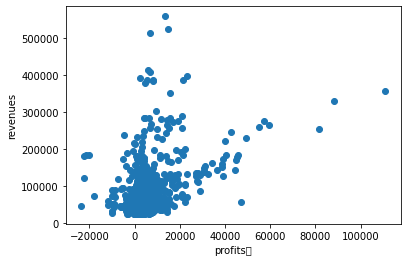

In [24]:
plt.scatter(df.profits,df['revenues'])
plt.xlabel('profits	')
plt.ylabel('revenues')

In [25]:
# Encode Categorical Values

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['year','rank']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [33]:
df['cluster']=y_predicted
df.head()

,year,rank,name,sector,industry,revenues,revchange,profits,prftchange,assets,employees,hqcity,hqstate,newcomer,profitable,ceowoman,jobgrowth,permalink,cluster
0,2019,1.0,Walmart,Retailing,General Merchandisers,514405.0,2.8,6670.0,-32.4,219295.0,2200000,Bentonville,Arkansas,no,yes,no,no,https://fortune.com/global500/2019/walmart/,0
1,2019,2.0,Sinopec Group,Energy,Petroleum Refining,414649.9,26.8,5845.0,280.1,329186.3,619151,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/sinopec-group/,0
2,2019,3.0,Royal Dutch Shell,Energy,Petroleum Refining,396556.0,27.2,23352.0,79.9,399194.0,81000,The Hague,NaN,no,yes,no,no,https://fortune.com/global500/2019/royal-dutch...,0
3,2019,4.0,China National Petroleum,Energy,Petroleum Refining,392976.6,20.5,2270.5,NaN,601899.9,1382401,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/china-natio...,0
4,2019,5.0,State Grid,Energy,Utilities,387056.0,10.9,8174.8,-14.3,572309.5,917717,Beijing,NaN,no,yes,no,yes,https://fortune.com/global500/2019/state-grid/,0


In [34]:
km.cluster_centers_

array([[2020.        ,   83.        ],
       [2020.        ,  416.07952286],
       [2020.        ,  249.03386454]])

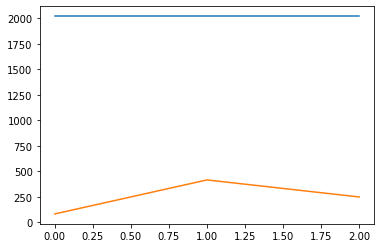

In [35]:
plt.plot(km.cluster_centers_)

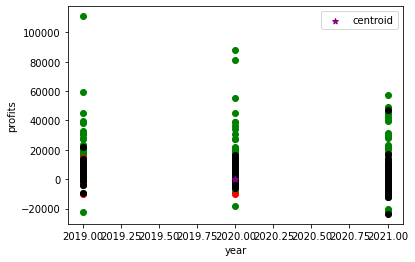

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.year,df1['profits'],color='green')
plt.scatter(df2.year,df2['profits'],color='red')
plt.scatter(df3.year,df3['profits'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('year')
plt.ylabel('profits')
plt.legend()

**Preprocessing using min max scaler**

In [40]:
scaler = MinMaxScaler()

scaler.fit(df[['revenues']])
df['revenues'] = scaler.transform(df[['revenues']])

scaler.fit(df[['profits']])
df['profits'] = scaler.transform(df[['profits']])

In [41]:
df.head()

,year,rank,name,sector,industry,revenues,revchange,profits,prftchange,assets,employees,hqcity,hqstate,newcomer,profitable,ceowoman,jobgrowth,permalink,cluster
0,2019,1.0,Walmart,Retailing,General Merchandisers,0.916379,2.8,0.225411,-32.4,219295.0,2200000,Bentonville,Arkansas,no,yes,no,no,https://fortune.com/global500/2019/walmart/,0
1,2019,2.0,Sinopec Group,Energy,Petroleum Refining,0.729959,26.8,0.219284,280.1,329186.3,619151,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/sinopec-group/,0
2,2019,3.0,Royal Dutch Shell,Energy,Petroleum Refining,0.696145,27.2,0.349295,79.9,399194.0,81000,The Hague,NaN,no,yes,no,no,https://fortune.com/global500/2019/royal-dutch...,0
3,2019,4.0,China National Petroleum,Energy,Petroleum Refining,0.689456,20.5,0.192739,NaN,601899.9,1382401,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/china-natio...,0
4,2019,5.0,State Grid,Energy,Utilities,0.678392,10.9,0.236586,-14.3,572309.5,917717,Beijing,NaN,no,yes,no,yes,https://fortune.com/global500/2019/state-grid/,0


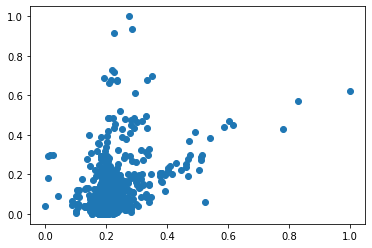

In [42]:
plt.scatter(df.profits,df['revenues'])

In [45]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['rank','year']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [46]:
df['cluster']=y_predicted
df.head()

,year,rank,name,sector,industry,revenues,revchange,profits,prftchange,assets,employees,hqcity,hqstate,newcomer,profitable,ceowoman,jobgrowth,permalink,cluster
0,2019,1.0,Walmart,Retailing,General Merchandisers,0.916379,2.8,0.225411,-32.4,219295.0,2200000,Bentonville,Arkansas,no,yes,no,no,https://fortune.com/global500/2019/walmart/,2
1,2019,2.0,Sinopec Group,Energy,Petroleum Refining,0.729959,26.8,0.219284,280.1,329186.3,619151,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/sinopec-group/,2
2,2019,3.0,Royal Dutch Shell,Energy,Petroleum Refining,0.696145,27.2,0.349295,79.9,399194.0,81000,The Hague,NaN,no,yes,no,no,https://fortune.com/global500/2019/royal-dutch...,2
3,2019,4.0,China National Petroleum,Energy,Petroleum Refining,0.689456,20.5,0.192739,NaN,601899.9,1382401,Beijing,NaN,no,yes,no,no,https://fortune.com/global500/2019/china-natio...,2
4,2019,5.0,State Grid,Energy,Utilities,0.678392,10.9,0.236586,-14.3,572309.5,917717,Beijing,NaN,no,yes,no,yes,https://fortune.com/global500/2019/state-grid/,2


In [47]:
km.cluster_centers_


array([[ 249.03386454, 2020.        ],
       [ 416.07952286, 2020.        ],
       [  83.        , 2020.        ]])

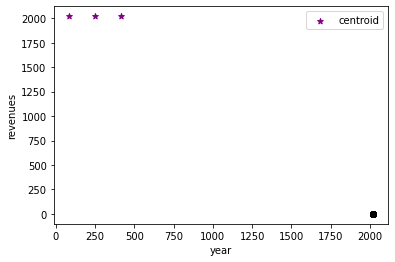

In [54]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.year,df1['revenues'],color='green')
plt.scatter(df2.year,df2['revenues'],color='red')
plt.scatter(df3.year,df3['revenues'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('year')
plt.ylabel('revenues')
plt.legend()

**Elbow Plot**

The technique to determine K, the number of clusters, is called the elbow method.``

In [55]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['rank','year']])
    sse.append(km.inertia_)

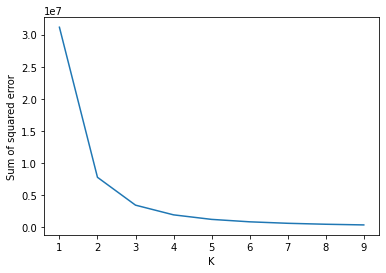

In [56]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)